In [169]:
#writing some conda package or module
#!pip install netCDF4
%matplotlib inline
import warnings
from netCDF4 import Dataset
import numpy as np
import xarray as xr
import pandas as pd
import matplotlib.pyplot as plt
#!pip install cartopy
import cartopy.feature as cfeature
import cartopy.crs as ccrs
import cartopy.mpl.ticker as cticker
from cartopy.util import add_cyclic_point

In [170]:
data = xr.open_dataset('/home/mkibria/Academic/pr_of_thesis/observation/chirps/chirps-v2.0.monthly.nc')
 

data

<xarray.Dataset>
Dimensions:    (latitude: 2000, longitude: 7200, time: 496)
Coordinates:
  * latitude   (latitude) float32 -49.97 -49.92 -49.88 ... 49.87 49.92 49.97
  * longitude  (longitude) float32 -180.0 -179.9 -179.9 ... 179.9 179.9 180.0
  * time       (time) datetime64[ns] 1981-01-01 1981-02-01 ... 2022-04-01
Data variables:
    precip     (time, latitude, longitude) float32 ...
Attributes: (12/15)
    Conventions:       CF-1.6
    title:             CHIRPS Version 2.0
    history:           created by Climate Hazards Group
    version:           Version 2.0
    date_created:      2022-05-16
    creator_name:      Pete Peterson
    ...                ...
    reference:         Funk, C.C., Peterson, P.J., Landsfeld, M.F., Pedreros,...
    comments:           time variable denotes the first day of the given month.
    acknowledgements:  The Climate Hazards Group InfraRed Precipitation with ...
    ftp_url:           ftp://chg-ftpout.geog.ucsb.edu/pub/org/chg/products/CH...
    website:           http://chg.geog.ucsb.edu/data/chirps/index.html
    faq:               http://chg-wiki.geog.ucsb.edu/wiki/CHIRPS_FAQ

In [171]:
#to select the year from 1980 to 2015
data = data.sel(time=slice('1981-01-16T12:00:00.000000000','2015-12-16T00:00:00.000000000'))
data

<xarray.Dataset>
Dimensions:    (latitude: 2000, longitude: 7200, time: 419)
Coordinates:
  * latitude   (latitude) float32 -49.97 -49.92 -49.88 ... 49.87 49.92 49.97
  * longitude  (longitude) float32 -180.0 -179.9 -179.9 ... 179.9 179.9 180.0
  * time       (time) datetime64[ns] 1981-02-01 1981-03-01 ... 2015-12-01
Data variables:
    precip     (time, latitude, longitude) float32 ...
Attributes: (12/15)
    Conventions:       CF-1.6
    title:             CHIRPS Version 2.0
    history:           created by Climate Hazards Group
    version:           Version 2.0
    date_created:      2022-05-16
    creator_name:      Pete Peterson
    ...                ...
    reference:         Funk, C.C., Peterson, P.J., Landsfeld, M.F., Pedreros,...
    comments:           time variable denotes the first day of the given month.
    acknowledgements:  The Climate Hazards Group InfraRed Precipitation with ...
    ftp_url:           ftp://chg-ftpout.geog.ucsb.edu/pub/org/chg/products/CH...
    website:           http://chg.geog.ucsb.edu/data/chirps/index.html
    faq:               http://chg-wiki.geog.ucsb.edu/wiki/CHIRPS_FAQ

In [172]:
#selecting only JJAS months

def is_jjas(month):
    return (month >= 6) & (month <= 9)

jjas_data = data.sel(time=is_jjas(data['time.month']))

jjas_data

<xarray.Dataset>
Dimensions:    (latitude: 2000, longitude: 7200, time: 140)
Coordinates:
  * latitude   (latitude) float32 -49.97 -49.92 -49.88 ... 49.87 49.92 49.97
  * longitude  (longitude) float32 -180.0 -179.9 -179.9 ... 179.9 179.9 180.0
  * time       (time) datetime64[ns] 1981-06-01 1981-07-01 ... 2015-09-01
Data variables:
    precip     (time, latitude, longitude) float32 ...
Attributes: (12/15)
    Conventions:       CF-1.6
    title:             CHIRPS Version 2.0
    history:           created by Climate Hazards Group
    version:           Version 2.0
    date_created:      2022-05-16
    creator_name:      Pete Peterson
    ...                ...
    reference:         Funk, C.C., Peterson, P.J., Landsfeld, M.F., Pedreros,...
    comments:           time variable denotes the first day of the given month.
    acknowledgements:  The Climate Hazards Group InfraRed Precipitation with ...
    ftp_url:           ftp://chg-ftpout.geog.ucsb.edu/pub/org/chg/products/CH...
    website:           http://chg.geog.ucsb.edu/data/chirps/index.html
    faq:               http://chg-wiki.geog.ucsb.edu/wiki/CHIRPS_FAQ

In [173]:
#to select the x and y coordinates
jjas_data = jjas_data.sel(longitude=slice(86,94),latitude=slice(20,27))
jjas_data

<xarray.Dataset>
Dimensions:    (latitude: 140, longitude: 160, time: 140)
Coordinates:
  * latitude   (latitude) float32 20.02 20.07 20.12 20.17 ... 26.88 26.92 26.97
  * longitude  (longitude) float32 86.02 86.08 86.12 86.17 ... 93.88 93.92 93.98
  * time       (time) datetime64[ns] 1981-06-01 1981-07-01 ... 2015-09-01
Data variables:
    precip     (time, latitude, longitude) float32 ...
Attributes: (12/15)
    Conventions:       CF-1.6
    title:             CHIRPS Version 2.0
    history:           created by Climate Hazards Group
    version:           Version 2.0
    date_created:      2022-05-16
    creator_name:      Pete Peterson
    ...                ...
    reference:         Funk, C.C., Peterson, P.J., Landsfeld, M.F., Pedreros,...
    comments:           time variable denotes the first day of the given month.
    acknowledgements:  The Climate Hazards Group InfraRed Precipitation with ...
    ftp_url:           ftp://chg-ftpout.geog.ucsb.edu/pub/org/chg/products/CH...
    website:           http://chg.geog.ucsb.edu/data/chirps/index.html
    faq:               http://chg-wiki.geog.ucsb.edu/wiki/CHIRPS_FAQ

In [174]:
#interpolating to low resolution 
new_lon=np.arange(86.25,92.75+1,0.625)
new_lat=np.arange(18.187744,27.309648,0.5)
jjas_data = jjas_data.interp(longitude=new_lon,latitude=new_lat)
jjas_data

<xarray.Dataset>
Dimensions:    (time: 140, latitude: 19, longitude: 12)
Coordinates:
  * time       (time) datetime64[ns] 1981-06-01 1981-07-01 ... 2015-09-01
  * longitude  (longitude) float64 86.25 86.88 87.5 88.12 ... 91.88 92.5 93.12
  * latitude   (latitude) float64 18.19 18.69 19.19 19.69 ... 26.19 26.69 27.19
Data variables:
    precip     (time, latitude, longitude) float64 nan nan nan ... nan nan nan
Attributes: (12/15)
    Conventions:       CF-1.6
    title:             CHIRPS Version 2.0
    history:           created by Climate Hazards Group
    version:           Version 2.0
    date_created:      2022-05-16
    creator_name:      Pete Peterson
    ...                ...
    reference:         Funk, C.C., Peterson, P.J., Landsfeld, M.F., Pedreros,...
    comments:           time variable denotes the first day of the given month.
    acknowledgements:  The Climate Hazards Group InfraRed Precipitation with ...
    ftp_url:           ftp://chg-ftpout.geog.ucsb.edu/pub/org/chg/products/CH...
    website:           http://chg.geog.ucsb.edu/data/chirps/index.html
    faq:               http://chg-wiki.geog.ucsb.edu/wiki/CHIRPS_FAQ

In [175]:
#getting the mean for JJAS data
jjas_mean = jjas_data.precip.mean('time')
 
jjas_mean

<xarray.DataArray 'precip' (latitude: 19, longitude: 12)>
array([[         nan,          nan,          nan,          nan,
                 nan,          nan,          nan,          nan,
                 nan,          nan,          nan,          nan],
       [         nan,          nan,          nan,          nan,
                 nan,          nan,          nan,          nan,
                 nan,          nan,          nan,          nan],
       [         nan,          nan,          nan,          nan,
                 nan,          nan,          nan,          nan,
                 nan,          nan,          nan,          nan],
       [         nan,          nan,          nan,          nan,
                 nan,          nan,          nan,          nan,
                 nan,          nan,          nan,          nan],
       [289.21782462,          nan,          nan,          nan,
                 nan,          nan,          nan,          nan,
                 nan,          nan,          nan, 845.22650224],
       [268.68226891, 276.84310336,          nan,          nan,
                 nan,          nan,          nan,          nan,
                 nan,          nan, 826.42169825, 672.68496829],
       [280.89524793, 278.37866112,          nan,          nan,
                 nan,          nan,          nan,          nan,
...
        269.35742439, 289.75731573, 318.38395083, 334.25576641,
        386.3556111 , 435.53885474, 510.19281529, 353.61871798],
       [246.96007177, 269.63106816, 293.54671863, 274.42740143,
        275.30281729, 307.71696918, 360.14187355, 445.87712461,
        509.01867077, 637.90840814, 492.37935699, 414.47756702],
       [239.26197917, 220.47769931, 282.79220435, 289.97955118,
        318.88909364, 350.68797372, 444.7028507 , 574.45505494,
        775.83610421, 772.85233427, 535.09066167, 345.88321468],
       [234.21085794, 276.37518146, 331.32154518, 360.02466434,
        350.55036959, 416.80245774, 516.11991795, 542.8795545 ,
        545.72099401, 427.38422506, 402.27078012, 227.81310939],
       [259.17647692, 331.21316434, 394.46987642, 465.31054187,
        527.51174206, 606.58443695, 554.07900277, 471.61026072,
        337.22363197, 308.55782304, 330.01741322, 334.71428104],
       [265.58150945, 344.47200545, 415.14912543, 477.73812466,
        578.7750842 , 592.841338  , 570.43612992, 465.0097178 ,
        400.74787606, 304.9014624 , 346.05517308, 353.77959643],
       [         nan,          nan,          nan,          nan,
                 nan,          nan,          nan,          nan,
                 nan,          nan,          nan,          nan]])
Coordinates:
  * longitude  (longitude) float64 86.25 86.88 87.5 88.12 ... 91.88 92.5 93.12
  * latitude   (latitude) float64 18.19 18.69 19.19 19.69 ... 26.19 26.69 27.19

In [176]:
#changing unit from mm/month to mm/day
pr_mm = jjas_mean/30.4167
pr_mm


chirps = pr_mm

In [177]:
data = xr.open_dataset('/home/mkibria/Academic/pr_of_thesis/model/MERRA/PRECTOT_MERRA2.tavg1_2m_flx_Nx.1980-2021.nc')

 
data

<xarray.Dataset>
Dimensions:    (time: 505, bnds: 2, lon: 576, lat: 361)
Coordinates:
  * time       (time) datetime64[ns] 1980-01-01T12:00:00 ... 2022-01-01T12:00:00
  * lon        (lon) float64 -180.0 -179.4 -178.8 -178.1 ... 178.1 178.8 179.4
  * lat        (lat) float64 -90.0 -89.5 -89.0 -88.5 ... 88.5 89.0 89.5 90.0
Dimensions without coordinates: bnds
Data variables:
    time_bnds  (time, bnds) datetime64[ns] ...
    PRECTOT    (time, lat, lon) float32 ...
Attributes: (12/34)
    CDI:                               Climate Data Interface version 1.9.9rc...
    history:                           Thu Jun 16 11:24:03 2022: cdo mergetim...
    Conventions:                       CF-1
    History:                           Original file generated: Sat May 31 17...
    Comment:                           GMAO filename: d5124_m2_jan79.tavg1_2d...
    Filename:                          MERRA2_100.tavg1_2d_flx_Nx.19800101.nc4
    ...                                ...
    RangeBeginningTime:                00:00:00.000000
    RangeEndingDate:                   1980-01-01
    RangeEndingTime:                   23:59:59.000000
    frequency:                         mon
    NCO:                               netCDF Operators version 4.8.1 (Homepa...
    CDO:                               Climate Data Operators version 1.9.9rc...

In [178]:
#to select the year from 1980 to 2015
data = data.sel(time=slice('1981-01-16T12:00:00.000000000','2015-12-16T00:00:00.000000000'))
data

<xarray.Dataset>
Dimensions:    (time: 419, bnds: 2, lon: 576, lat: 361)
Coordinates:
  * time       (time) datetime64[ns] 1981-01-16T12:00:00 ... 2015-11-16
  * lon        (lon) float64 -180.0 -179.4 -178.8 -178.1 ... 178.1 178.8 179.4
  * lat        (lat) float64 -90.0 -89.5 -89.0 -88.5 ... 88.5 89.0 89.5 90.0
Dimensions without coordinates: bnds
Data variables:
    time_bnds  (time, bnds) datetime64[ns] 1981-01-01T00:30:00 ... 2015-11-30...
    PRECTOT    (time, lat, lon) float32 ...
Attributes: (12/34)
    CDI:                               Climate Data Interface version 1.9.9rc...
    history:                           Thu Jun 16 11:24:03 2022: cdo mergetim...
    Conventions:                       CF-1
    History:                           Original file generated: Sat May 31 17...
    Comment:                           GMAO filename: d5124_m2_jan79.tavg1_2d...
    Filename:                          MERRA2_100.tavg1_2d_flx_Nx.19800101.nc4
    ...                                ...
    RangeBeginningTime:                00:00:00.000000
    RangeEndingDate:                   1980-01-01
    RangeEndingTime:                   23:59:59.000000
    frequency:                         mon
    NCO:                               netCDF Operators version 4.8.1 (Homepa...
    CDO:                               Climate Data Operators version 1.9.9rc...

In [179]:
#selecting only JJAS months

def is_jjas(month):
    return (month >= 6) & (month <= 9)

jjas_data = data.sel(time=is_jjas(data['time.month']))

jjas_data

<xarray.Dataset>
Dimensions:    (time: 140, bnds: 2, lon: 576, lat: 361)
Coordinates:
  * time       (time) datetime64[ns] 1981-06-01T12:00:00 ... 2015-09-16
  * lon        (lon) float64 -180.0 -179.4 -178.8 -178.1 ... 178.1 178.8 179.4
  * lat        (lat) float64 -90.0 -89.5 -89.0 -88.5 ... 88.5 89.0 89.5 90.0
Dimensions without coordinates: bnds
Data variables:
    time_bnds  (time, bnds) datetime64[ns] 1981-06-01T00:30:00 ... 2015-09-30...
    PRECTOT    (time, lat, lon) float32 ...
Attributes: (12/34)
    CDI:                               Climate Data Interface version 1.9.9rc...
    history:                           Thu Jun 16 11:24:03 2022: cdo mergetim...
    Conventions:                       CF-1
    History:                           Original file generated: Sat May 31 17...
    Comment:                           GMAO filename: d5124_m2_jan79.tavg1_2d...
    Filename:                          MERRA2_100.tavg1_2d_flx_Nx.19800101.nc4
    ...                                ...
    RangeBeginningTime:                00:00:00.000000
    RangeEndingDate:                   1980-01-01
    RangeEndingTime:                   23:59:59.000000
    frequency:                         mon
    NCO:                               netCDF Operators version 4.8.1 (Homepa...
    CDO:                               Climate Data Operators version 1.9.9rc...

In [180]:
#to select the x and y coordinates
jjas_data = jjas_data.sel(lon=slice(86.875,94),lat=slice(18,27.5))
jjas_data

<xarray.Dataset>
Dimensions:    (time: 140, bnds: 2, lon: 12, lat: 20)
Coordinates:
  * time       (time) datetime64[ns] 1981-06-01T12:00:00 ... 2015-09-16
  * lon        (lon) float64 86.88 87.5 88.12 88.75 ... 91.88 92.5 93.12 93.75
  * lat        (lat) float64 18.0 18.5 19.0 19.5 20.0 ... 26.0 26.5 27.0 27.5
Dimensions without coordinates: bnds
Data variables:
    time_bnds  (time, bnds) datetime64[ns] 1981-06-01T00:30:00 ... 2015-09-30...
    PRECTOT    (time, lat, lon) float32 ...
Attributes: (12/34)
    CDI:                               Climate Data Interface version 1.9.9rc...
    history:                           Thu Jun 16 11:24:03 2022: cdo mergetim...
    Conventions:                       CF-1
    History:                           Original file generated: Sat May 31 17...
    Comment:                           GMAO filename: d5124_m2_jan79.tavg1_2d...
    Filename:                          MERRA2_100.tavg1_2d_flx_Nx.19800101.nc4
    ...                                ...
    RangeBeginningTime:                00:00:00.000000
    RangeEndingDate:                   1980-01-01
    RangeEndingTime:                   23:59:59.000000
    frequency:                         mon
    NCO:                               netCDF Operators version 4.8.1 (Homepa...
    CDO:                               Climate Data Operators version 1.9.9rc...

In [181]:
#getting the mean for JJAS data
jjas_mean = jjas_data.PRECTOT.mean('time')
 
jjas_mean

<xarray.DataArray 'PRECTOT' (lat: 20, lon: 12)>
array([[1.32618356e-04, 1.30065368e-04, 1.28409476e-04, 1.28532149e-04,
        1.30463653e-04, 1.30317218e-04, 1.28487300e-04, 1.27769439e-04,
        1.31347944e-04, 1.34588045e-04, 1.38847012e-04, 1.49006199e-04],
       [1.36541275e-04, 1.34484202e-04, 1.31048815e-04, 1.29665452e-04,
        1.27702413e-04, 1.26592699e-04, 1.25204795e-04, 1.25265622e-04,
        1.29239212e-04, 1.33902809e-04, 1.39870564e-04, 1.53223591e-04],
       [1.36127303e-04, 1.36208037e-04, 1.29093751e-04, 1.29432621e-04,
        1.28488668e-04, 1.27814012e-04, 1.23894773e-04, 1.22846075e-04,
        1.24430808e-04, 1.31912908e-04, 1.41967146e-04, 1.61860007e-04],
       [1.42727557e-04, 1.41649580e-04, 1.33344060e-04, 1.30853659e-04,
        1.27352105e-04, 1.26477171e-04, 1.24371130e-04, 1.26577492e-04,
        1.26975428e-04, 1.34896720e-04, 1.48233841e-04, 1.79499111e-04],
       [1.49769650e-04, 1.42723162e-04, 1.33989452e-04, 1.31866167e-04,
        1.29040680e-04, 1.28018524e-04, 1.26653889e-04, 1.26776766e-04,
        1.29166627e-04, 1.42029967e-04, 1.67725681e-04, 2.09188162e-04],
       [1.54534428e-04, 1.42878576e-04, 1.37655661e-04, 1.32006520e-04,
        1.26824321e-04, 1.24287166e-04, 1.26270112e-04, 1.31054025e-04,
        1.40263452e-04, 1.69290113e-04, 2.08785714e-04, 2.23287730e-04],
       [1.50768043e-04, 1.37535288e-04, 1.34038870e-04, 1.31636611e-04,
        1.30103697e-04, 1.27608102e-04, 1.26500978e-04, 1.31446563e-04,
...
        1.59247225e-04, 1.84539487e-04, 2.18624642e-04, 2.16070999e-04],
       [8.92213648e-05, 1.03461251e-04, 9.95386872e-05, 1.02650614e-04,
        1.16514319e-04, 1.27586187e-04, 1.38294214e-04, 1.45757076e-04,
        1.31686334e-04, 1.63924647e-04, 1.62500262e-04, 1.75508045e-04],
       [8.32985315e-05, 9.27938308e-05, 1.02637860e-04, 1.05134000e-04,
        1.04043145e-04, 1.22373574e-04, 1.49873464e-04, 3.22517939e-04,
        3.33845586e-04, 2.15248132e-04, 1.45072976e-04, 1.68834420e-04],
       [8.59497450e-05, 8.99764345e-05, 9.20612074e-05, 9.67274027e-05,
        1.22162295e-04, 1.28419153e-04, 1.29629421e-04, 1.37510651e-04,
        1.94144974e-04, 1.80073650e-04, 1.37442315e-04, 1.63183038e-04],
       [8.32530422e-05, 1.04152714e-04, 1.29058055e-04, 1.10385168e-04,
        1.06803302e-04, 1.03901395e-04, 1.21046804e-04, 1.31636931e-04,
        1.41678815e-04, 1.44221485e-04, 1.62231969e-04, 1.50474734e-04],
       [1.77239592e-04, 1.72406624e-04, 2.27787139e-04, 2.93186895e-04,
        4.08944790e-04, 3.52181291e-04, 3.26364796e-04, 2.25069962e-04,
        2.14237618e-04, 1.69878258e-04, 1.54514564e-04, 1.63508244e-04],
       [2.48989614e-04, 2.15576700e-04, 2.44563271e-04, 3.33491422e-04,
        3.80465266e-04, 3.50876071e-04, 3.46309971e-04, 2.47452699e-04,
        3.33217526e-04, 2.67684372e-04, 2.98521045e-04, 2.36137639e-04]],
      dtype=float32)
Coordinates:
  * lon      (lon) float64 86.88 87.5 88.12 88.75 ... 91.88 92.5 93.12 93.75
  * lat      (lat) float64 18.0 18.5 19.0 19.5 20.0 ... 25.5 26.0 26.5 27.0 27.5

In [182]:
merra = jjas_mean*86400
merra

<xarray.DataArray 'PRECTOT' (lat: 20, lon: 12)>
array([[11.45822592, 11.23764776, 11.09457873, 11.10517764, 11.27205966,
        11.2594076 , 11.10130269, 11.03927954, 11.34846238, 11.62840705,
        11.99638182, 12.87413556],
       [11.7971662 , 11.61943506, 11.32261762, 11.20309504, 11.03348848,
        10.93760915, 10.81769429, 10.82294974, 11.16626789, 11.56920274,
        12.08481677, 13.23851827],
       [11.76139894, 11.76837436, 11.15370006, 11.18297847, 11.10142088,
        11.04313061, 10.70450842, 10.61390089, 10.75082179, 11.39727524,
        12.26596143, 13.98470462],
       [12.33166088, 12.23852369, 11.52092675, 11.30575617, 11.00322185,
        10.92762756, 10.74566566, 10.93629529, 10.97067702, 11.65507659,
        12.80740388, 15.50872321],
       [12.94009779, 12.33128118, 11.57668862, 11.39323683, 11.14911474,
        11.0608005 , 10.94289604, 10.95351255, 11.15999655, 12.27138913,
        14.4914988 , 18.07385716],
       [13.35177454, 12.34470899, 11.89344912, 11.40536335, 10.95762136,
        10.73841113, 10.90973765, 11.32306773, 12.11876222, 14.62666579,
        18.03908567, 19.29205991],
       [13.02635889, 11.88304885, 11.58095836, 11.37340316, 11.24095945,
        11.02534002, 10.92968448, 11.35698301, 13.05471822, 17.28646704,
...
         9.39712138, 10.678592  , 12.77145934, 13.75896027, 15.9442117 ,
        18.88916907, 18.66853433],
       [ 7.70872592,  8.93905205,  8.60014257,  8.86901307, 10.06683712,
        11.02344655, 11.94862006, 12.59341137, 11.3776993 , 14.16308954,
        14.04002267, 15.16389507],
       [ 7.19699312,  8.01738699,  8.86791106,  9.08357764,  8.98932775,
        10.57307683, 12.94906726, 27.86554992, 28.84425865, 18.59743861,
        12.53430513, 14.58729389],
       [ 7.42605797,  7.77396394,  7.95408832,  8.35724759, 10.5548223 ,
        11.09541482, 11.199982  , 11.88092027, 16.77412572, 15.55836336,
        11.87501606, 14.0990145 ],
       [ 7.19306285,  8.99879448, 11.15061594,  9.53727853,  9.22780526,
         8.97708053, 10.45844383, 11.37343082, 12.24104958, 12.46073633,
        14.0168421 , 13.00101704],
       [15.31350072, 14.89593233, 19.68080881, 25.33134772, 35.33282988,
        30.4284635 , 28.19791837, 19.44604469, 18.51013019, 14.67748149,
        13.35005835, 14.12711232],
       [21.51270267, 18.62582685, 21.1302666 , 28.81365884, 32.87219899,
        30.31569254, 29.9211815 , 21.3799132 , 28.78999421, 23.12792977,
        25.79221828, 20.40229202]])
Coordinates:
  * lon      (lon) float64 86.88 87.5 88.12 88.75 ... 91.88 92.5 93.12 93.75
  * lat      (lat) float64 18.0 18.5 19.0 19.5 20.0 ... 25.5 26.0 26.5 27.0 27.5

In [183]:
bias = merra - chirps
bias

<xarray.DataArray (lat: 20, lon: 12, latitude: 19, longitude: 12)>
array([[[[            nan,             nan,             nan, ...,
                      nan,             nan,             nan],
         [            nan,             nan,             nan, ...,
                      nan,             nan,             nan],
         [            nan,             nan,             nan, ...,
                      nan,             nan,             nan],
         ...,
         [ 2.93736478e+00,  5.69037931e-01, -1.51063252e+00, ...,
           1.31387025e+00,  6.08350253e-01,  4.53932850e-01],
         [ 2.72678860e+00,  1.33131303e-01, -2.19049749e+00, ...,
           1.43407924e+00,  8.10820137e-02, -1.72871352e-01],
         [            nan,             nan,             nan, ...,
                      nan,             nan,             nan]],

        [[            nan,             nan,             nan, ...,
                      nan,             nan,             nan],
         [            nan,             nan,             nan, ...,
                      nan,             nan,             nan],
         [            nan,             nan,             nan, ...,
                      nan,             nan,             nan],
...
         [ 1.72713571e+01,  1.49030303e+01,  1.28233598e+01, ...,
           1.56478626e+01,  1.49423426e+01,  1.47879252e+01],
         [ 1.70607810e+01,  1.44671237e+01,  1.21434949e+01, ...,
           1.57680716e+01,  1.44150744e+01,  1.41611210e+01],
         [            nan,             nan,             nan, ...,
                      nan,             nan,             nan]],

        [[            nan,             nan,             nan, ...,
                      nan,             nan,             nan],
         [            nan,             nan,             nan, ...,
                      nan,             nan,             nan],
         [            nan,             nan,             nan, ...,
                      nan,             nan,             nan],
         ...,
         [ 1.18814309e+01,  9.51310403e+00,  7.43343359e+00, ...,
           1.02579364e+01,  9.55241635e+00,  9.39799895e+00],
         [ 1.16708547e+01,  9.07719741e+00,  6.75356861e+00, ...,
           1.03781453e+01,  9.02514812e+00,  8.77119475e+00],
         [            nan,             nan,             nan, ...,
                      nan,             nan,             nan]]]])
Coordinates:
  * lon        (lon) float64 86.88 87.5 88.12 88.75 ... 91.88 92.5 93.12 93.75
  * lat        (lat) float64 18.0 18.5 19.0 19.5 20.0 ... 26.0 26.5 27.0 27.5
  * longitude  (longitude) float64 86.25 86.88 87.5 88.12 ... 91.88 92.5 93.12
  * latitude   (latitude) float64 18.19 18.69 19.19 19.69 ... 26.19 26.69 27.19

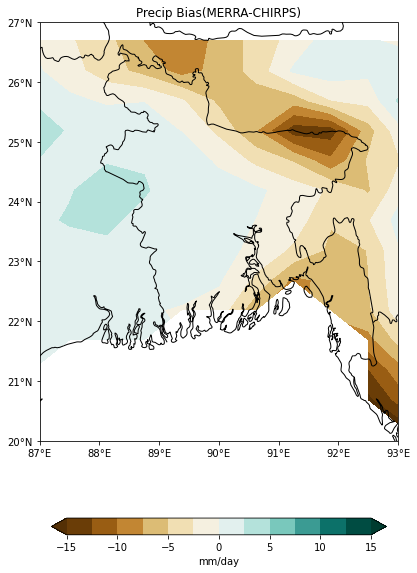

In [184]:
# Plotting annual_pr_mean

#plotting with cartopy
import cartopy.feature as cfeature


fig = plt.figure(figsize=(12,9.5))

ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_extent([88,93,20,27])


m1 = ax.contourf(bias['longitude'][:], bias['latitude'][:],bias[0,0,:,:],
                levels=np.arange(-15,15+1,2.5),  transform = ccrs.PlateCarree(),cmap='BrBG',extend='both')

 
# Define the xticks for longitude
ax.set_xticks(np.arange(87,94,1), crs=ccrs.PlateCarree())
lon_formatter = cticker.LongitudeFormatter()
ax.xaxis.set_major_formatter(lon_formatter)

# Define the yticks for latitude
ax.set_yticks(np.arange(20,28,1), crs=ccrs.PlateCarree())
lat_formatter = cticker.LatitudeFormatter()
ax.yaxis.set_major_formatter(lat_formatter)


plt.colorbar(m1, orientation = 'horizontal',shrink=0.5, fraction = 0.04 , label = 'mm/day')
ax.coastlines()
ax.add_feature(cfeature.BORDERS)
#ax.add_feature(cfeature.STATES)
plt.title('Precip Bias(MERRA-CHIRPS)')
plt.savefig("/home/mkibria/Academic/pr_of_thesis/figures/Bias(merra-chirps).png")

In [ ]:
#cma colors
'''Colormap CET_D1A is not recognized. Possible values are: Accent, Accent_r, Blues, Blues_r, 
BrBG, BrBG_r, BuGn, BuGn_r, BuPu, BuPu_r, CMRmap, CMRmap_r, Dark2, Dark2_r, GnBu, GnBu_r, Greens,
Greens_r, Greys, Greys_r, OrRd, OrRd_r, Oranges, Oranges_r, PRGn, PRGn_r, Paired, Paired_r, Pastel1, Pastel1_r, Pastel2, 
Pastel2_r, PiYG, PiYG_r, PuBu, PuBuGn, PuBuGn_r, PuBu_r, PuOr, PuOr_r, PuRd, PuRd_r, Purples, Purples_r, RdBu, RdBu_r, RdGy,
RdGy_r, RdPu, RdPu_r, RdYlBu, RdYlBu_r, RdYlGn, RdYlGn_r, Reds, Reds_r, Set1, Set1_r, Set2, Set2_r, Set3, Set3_r, Spectral, 
Spectral_r, Wistia, Wistia_r, YlGn, YlGnBu, YlGnBu_r, YlGn_r, YlOrBr, YlOrBr_r, YlOrRd, YlOrRd_r, afmhot, afmhot_r, autumn,
autumn_r, binary, binary_r, bone, bone_r, brg, brg_r, bwr, bwr_r, cividis, cividis_r, cool, cool_r, coolwarm, coolwarm_r, 
copper, copper_r, cubehelix, cubehelix_r, flag, flag_r, gist_earth, gist_earth_r, gist_gray, gist_gray_r, gist_heat,
gist_heat_r, gist_ncar, gist_ncar_r, gist_rainbow, gist_rainbow_r, gist_stern, gist_stern_r, gist_yarg, gist_yarg_r,
gnuplot, gnuplot2, gnuplot2_r, gnuplot_r, gray, gray_r, hot, hot_r, hsv, hsv_r, inferno, inferno_r, jet, jet_r, magma,
magma_r, nipy_spectral, nipy_spectral_r, ocean, ocean_r, pink, pink_r, plasma, plasma_r, prism, prism_r, rainbow, rainbow_r, 
seismic, seismic_r, spring, spring_r, summer, summer_r, tab10, tab10_r, tab20, tab20_r, tab20b, tab20b_r, tab20c, tab20c_r, 
ter'''